# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 27: Constraints on Numbers of Assets

## 1. Downloading the data:

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [18]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.0900%,-2.8287%,-2.5688%,-2.5585%,-0.9612%,-0.4902%,-1.6936%,-0.2491%,-2.0270%,-0.3136%,...,0.0513%,-0.5064%,-1.3444%,-3.4978%,-0.1744%,1.2946%,-2.1854%,-1.2140%,-0.7573%,-2.1612%
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1367%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1116%,-1.1387%,-0.9719%,-1.1254%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [19]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'CVaR' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,10.5262%,0.0000%,0.0000%,9.5564%,0.0000%,5.6182%,0.0000%,0.0000%,...,13.6311%,0.0000%,0.0000%,0.0000%,0.0000%,12.0739%,0.0000%,0.0000%,2.5626%,0.0000%


### 2.2 Plotting portfolio composition

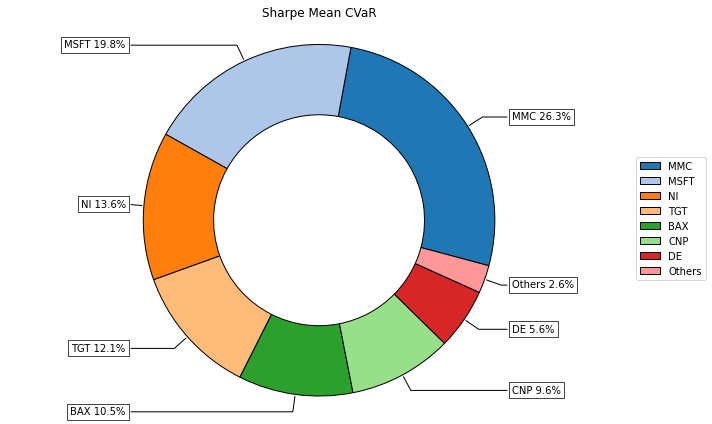

In [20]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Sharpe Mean CVaR',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [21]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w,4) > 0, 1, 0)).item()

# Number of effective assets in portfolio
nea = 1/np.sum(w ** 2).item()

print('Number of Assets:', n_assets)
print('Number of Effective Assets:', nea)

Number of Assets: 8
Number of Effective Assets: 6.051920363268836


### 2.3 Calculating the portfolio including a constraint on the maximum number of assets.

This kind of constraint help us to put a limit in the maximum number of assets, this could be helpful for small investors that can't afford buy too many assets.

In [22]:
!pip3 install gurobi

ERROR: Could not find a version that satisfies the requirement gurobi (from versions: none)
ERROR: No matching distribution found for gurobi


In [23]:
# First we need to set a solver that support Mixed Integer Programming
#port.solvers = ['GUROBI']

# Then we need to set the cardinality constraint (maximum number of assets)
#port.card = 9

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,10.5262%,0.0000%,0.0000%,9.5564%,0.0000%,5.6182%,0.0000%,0.0000%,...,13.6311%,0.0000%,0.0000%,0.0000%,0.0000%,12.0739%,0.0000%,0.0000%,2.5626%,0.0000%


### 2.4 Plotting portfolio composition

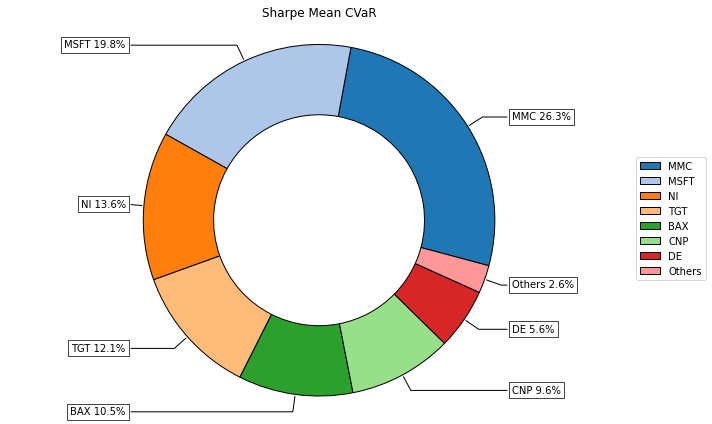

In [24]:
ax = rp.plot_pie(w=w,
                 title='Sharpe Mean CVaR',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [25]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w,4) > 0, 1, 0)).item()

# Number of effective assets in portfolio
nea = 1/np.sum(w ** 2).item()

print('Number of Assets:', n_assets)
print('Number of Effective Assets:', nea)

Number of Assets: 8
Number of Effective Assets: 6.051920363268836


### 2.5 Calculating the portfolio including a constraint on the minimum number of effective assets.

This kind of constraint help us to put a limit in the minimum number of effective assets, this could be helpful to increase the portfolio diversification.

In [26]:
# First we need to delete the cardinality constraint
port.card = None 

# Then we need to set the constraint on the minimum number of effective assets
port.nea = 12

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.8927%,10.0460%,0.0000%,2.8986%,9.1492%,0.4222%,6.0249%,0.0000%,0.1591%,...,10.5670%,1.3021%,0.8213%,0.0000%,2.5597%,10.8862%,4.9479%,0.0000%,7.8034%,0.0000%


### 2.6 Plotting portfolio composition

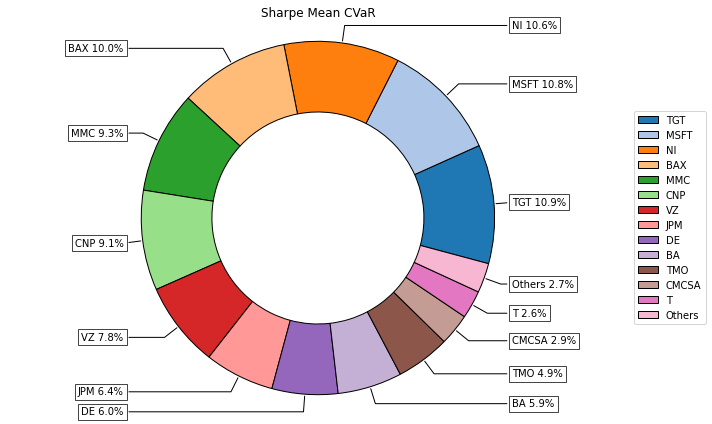

In [27]:
ax = rp.plot_pie(w=w,
                 title='Sharpe Mean CVaR',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

In [28]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w,4) > 0, 1, 0)).item()

# Number of effective assets in portfolio
nea = 1/np.sum(w ** 2).item()

print('Number of Assets:', n_assets)
print('Number of Effective Assets:', nea)

Number of Assets: 17
Number of Effective Assets: 11.999999999772692
